Assignment 5 - Regression EDA and basic modeling


Tyler Gardner

9/22/2021

# Task 1 

## Code Chunk 1 - Set up, data import, data exploration

In the Code Chunk 1 all the necessary packages needed for the assignment are added, the google drive is mounted to import and read in the data using the pd.read_csv. The overall structure and summary of the input datam is shown and explored using the info(), describe(), head() and other commands similar commands. The last part of this code chunk includes the column that is removed and reasoning on why it is removed.

In [25]:
# A.
# Import packages needed

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

In [26]:
# mount the google drive location so we can read the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
# Import data using pd.read_csv()
NA_sales_filtered_raw = pd.read_csv("/content/drive/MyDrive/data_sets/NA_sales_filtered.csv",encoding = "ISO-8859-1")
NA_sales_filtered = NA_sales_filtered_raw.copy()

# raw is the original unedited version of our data which can be useful for inspecting changes we've made 
# compared to the original unedited data

In [28]:
NA_sales_filtered.head()

,Name,Platform,Genre,Rating,Critic_Score,Critic_Count,User_Score,User_Count,NA_Sales
0,Final Fantasy VII,PS,Role-Playing,T,92,20,91,1282,3.01
1,Final Fantasy X,PS2,Role-Playing,T,92,53,86,1056,2.91
2,The Sims 3,PC,Simulation,T,86,75,75,886,0.99
3,Final Fantasy VIII,PS,Role-Playing,T,90,24,85,644,2.28
4,Tekken 3,PS,Fighting,T,96,15,90,367,3.27


In [29]:
NA_sales_filtered.describe()

,Critic_Score,Critic_Count,User_Score,User_Count,NA_Sales
count,6345.000000,6345.000000,6345.000000,6345.000000,6345.000000
mean,69.819385,28.966745,70.765485,152.730969,0.354230
std,13.945811,19.098594,14.438432,545.962483,0.494404
min,13.000000,3.000000,5.000000,4.000000,0.010000
25%,61.000000,14.000000,64.000000,10.000000,0.080000
50%,72.000000,25.000000,74.000000,24.000000,0.170000
75%,80.000000,40.000000,81.000000,77.000000,0.410000
max,98.000000,113.000000,95.000000,10665.000000,3.490000


In [30]:
NA_sales_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6345 entries, 0 to 6344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          6345 non-null   object 
 1   Platform      6345 non-null   object 
 2   Genre         6345 non-null   object 
 3   Rating        6345 non-null   object 
 4   Critic_Score  6345 non-null   int64  
 5   Critic_Count  6345 non-null   int64  
 6   User_Score    6345 non-null   int64  
 7   User_Count    6345 non-null   int64  
 8   NA_Sales      6345 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 446.3+ KB


In [31]:
NA_sales_filtered.isnull().sum()

Name            0
Platform        0
Genre           0
Rating          0
Critic_Score    0
Critic_Count    0
User_Score      0
User_Count      0
NA_Sales        0
dtype: int64

In [32]:
NA_sales_filtered.shape

(6345, 9)

In [33]:
# C. Remove one column before modeling
NA_sales_filtered = NA_sales_filtered[['Platform', 'Genre', 'Rating', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'NA_Sales']]
NA_sales_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6345 entries, 0 to 6344
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Platform      6345 non-null   object 
 1   Genre         6345 non-null   object 
 2   Rating        6345 non-null   object 
 3   Critic_Score  6345 non-null   int64  
 4   Critic_Count  6345 non-null   int64  
 5   User_Score    6345 non-null   int64  
 6   User_Count    6345 non-null   int64  
 7   NA_Sales      6345 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 396.7+ KB


C. Remove the column that should be removed and in a text block explain your reasoning for dropping the table.

The 'Name' column was the column that needed to be removed before modeling. The reason it needed to be removed was because in the name column there was more than a few categories within the column itself. With how many different Names there are in the name column, it is not good for modeling and evauluating/testing the data.

# Task 2 

## Code Chunk 2 - Plot and Evaluate data


In Code Chunk 2, a seaborn pairplot is used to plot the data. A variable is then created for correlations in the dataframe and using the correlation variable a seaborn heatmap is produced. After all that code a text box is then used to evaluate the strongest positive correlations, strongest negative correlations, and the least correlation from the output of the heatmap.

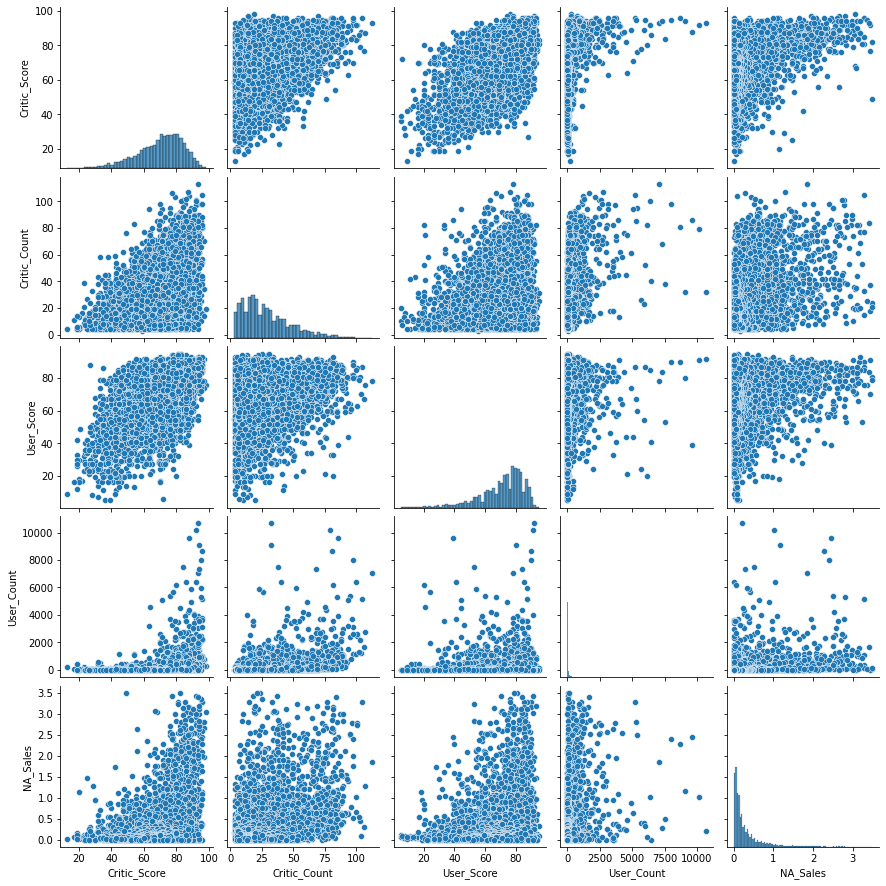

In [34]:
# B. Use seaborn pairplot to plot your data.
# Create a seaborn pairplot
sns.pairplot(NA_sales_filtered)

In [35]:
# C. Create a variable for correlations in the dataframe.
# Compute Correlation
cor = NA_sales_filtered.corr()

[]

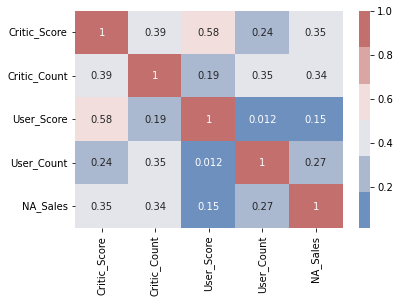

In [36]:
# C. Using the correlation variable create a seaborn heatmap.
sns.heatmap(cor, 
            annot=True,
            cmap=sns.color_palette("vlag"), 
        xticklabels=cor.columns,
        yticklabels=cor.columns)

plt.plot()

D. In a text block below the heatmap tell which two colums had the strongest positive correlations, the strongest negative correlation and the least correlation.

Strongest Positive Correlation: Critic_Score and User_Score

Strongest Negative Correlation: User_Count and User_Score

Least Correlation: Critic_Count and Critic_Score

# Task 3 

## Code Chunk 3 - Simple hold-out evaluation and Histogram


In Code Chunk 3, The dataset is partitioned for simple hold-out evaluation. 70% for training, 30% of the data for testing. The target is not stratified per the instructions of the assignment. After encoding the data set and doing the train_test_split of the dataset, the overall summaries of the training and test sets are shown. Lastly, a histogram of the y variable in both the test and train datasets are outputted.

In [37]:
# Encode the Dataset
NA_sales_filtered_ENC = pd.get_dummies(NA_sales_filtered)

In [38]:
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(NA_sales_filtered_ENC,
                                                    NA_sales_filtered_ENC['NA_Sales'],
                                                    test_size=.3,
                                                    random_state=random_state)

In [39]:
# Train Overall Summaries
X_train.describe(include='all')

,Critic_Score,Critic_Count,User_Score,User_Count,NA_Sales,Platform_3DS,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Rating_E,Rating_E10+,Rating_M,Rating_T,Rating_missing
count,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.00000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000
mean,69.874578,29.113713,70.790137,148.383247,0.356093,0.022968,0.073857,0.038505,0.057420,0.049088,0.023643,0.178113,0.118892,0.033326,0.055618,0.011709,0.075433,0.012159,0.133303,0.092322,0.023643,0.238685,0.036028,0.059221,0.060347,0.063724,0.017564,0.084891,0.102454,0.12317,0.038955,0.142535,0.032425,0.311867,0.140959,0.204684,0.338888,0.003603
std,14.013822,19.129240,14.412929,517.265687,0.499680,0.149818,0.261568,0.192433,0.232669,0.216076,0.151952,0.382651,0.323698,0.179506,0.229209,0.107585,0.264119,0.109610,0.339941,0.289512,0.151952,0.426328,0.186381,0.236064,0.238155,0.244289,0.131374,0.278750,0.303279,0.32867,0.193510,0.349638,0.177146,0.463308,0.348019,0.403516,0.473385,0.059922
min,13.000000,3.000000,7.000000,4.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,62.000000,14.000000,64.000000,10.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,72.000000,25.000000,74.000000,25.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,80.000000,40.000000,81.000000,80.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,98.000000,107.000000,95.000000,10665.000000,3.490000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
# Test Overall Summaries
X_test.describe(include='all')

,Critic_Score,Critic_Count,User_Score,User_Count,NA_Sales,Platform_3DS,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Rating_E,Rating_E10+,Rating_M,Rating_T,Rating_missing
count,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000
mean,69.690651,28.623950,70.707983,162.871849,0.349884,0.020483,0.067752,0.035189,0.051471,0.045168,0.023634,0.180672,0.116071,0.032563,0.069328,0.019433,0.073529,0.014181,0.134454,0.088235,0.027836,0.256828,0.028887,0.050945,0.058298,0.054097,0.018382,0.084034,0.098739,0.131828,0.040966,0.151261,0.025735,0.306197,0.131828,0.202731,0.355567,0.003676
std,13.788676,19.027523,14.501375,607.677725,0.481975,0.141683,0.251386,0.184306,0.221014,0.207727,0.151947,0.384847,0.320395,0.177537,0.254077,0.138077,0.261072,0.118266,0.341229,0.283711,0.164546,0.436998,0.167532,0.219944,0.234368,0.226268,0.134365,0.277511,0.298390,0.338392,0.198264,0.358397,0.158386,0.461034,0.338392,0.402139,0.478811,0.060538
min,19.000000,4.000000,5.000000,4.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,61.000000,14.000000,63.000000,10.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,71.000000,24.000000,74.000000,24.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,80.000000,39.000000,81.000000,72.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,96.000000,113.000000,95.000000,9073.000000,3.430000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


[]

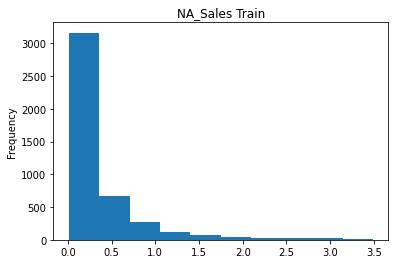

In [41]:
# C. Show a histogram of the y variable in both the test and train
X_train.NA_Sales.plot.hist(title="NA_Sales Train")
plt.plot()

[]

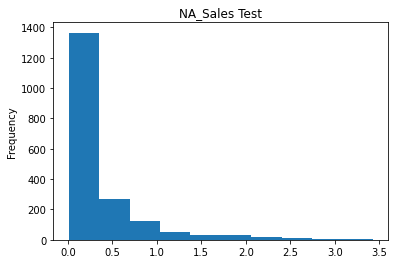

In [42]:
X_test.NA_Sales.plot.hist(title="NA_Sales Test")
plt.plot()

# Task 4 

## Code Chunk 4 - Simple Regression Model Training

Code Chunk 4 contains code that runs a loop to train a model for each of the variables in the dataset and plots each model. Included with each plotted model is the R-squared and the p-value for each model.

In [43]:
# A. Train a model for each of the variables in the dataset
def helper_fun(predictor,df):
  model = stats.linregress(X_train[predictor], X_train['NA_Sales'])
  print("r2_value",model.rvalue**2)
  print("p value",model.pvalue)

  #print("r2_value",model.coef)
  plt.plot(X_train[predictor], X_train['NA_Sales'], 'o', label='original data')
  plt.plot(X_train[predictor], model.intercept + model.slope*X_train[predictor], 'r', label='fitted line')
  plt.legend()
  plt.title(f'Regressing NA_Sales and {predictor}')
  plt.xlabel(predictor)
  plt.ylabel('NA_Sales')
  plt.show()

r2_value 0.12348853653194569
p value 3.0357248966700315e-129


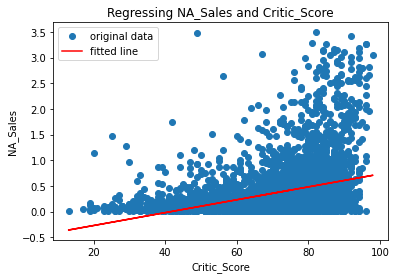

r2_value 0.11854051875696556
p value 8.264928887268848e-124


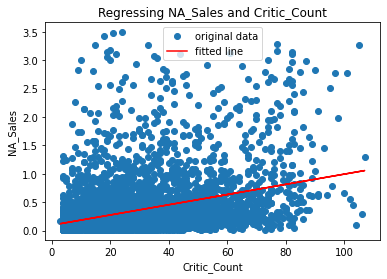

r2_value 0.019485015132064867
p value 9.147634738480213e-21


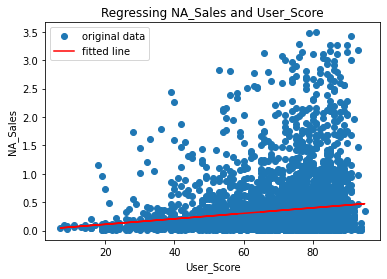

r2_value 0.08490236572071139
p value 1.229510102004289e-87


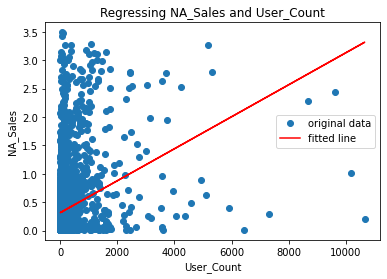

r2_value 0.0008695814591258075
p value 0.04941154377143825


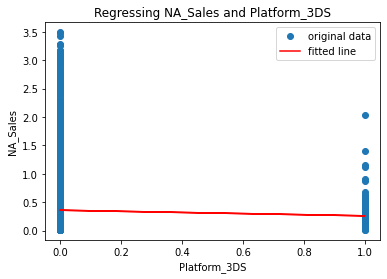

r2_value 0.0002933121733181449
p value 0.25383782010258005


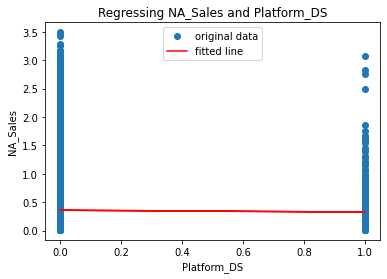

r2_value 4.267458640413875e-06
p value 0.8905353173638973


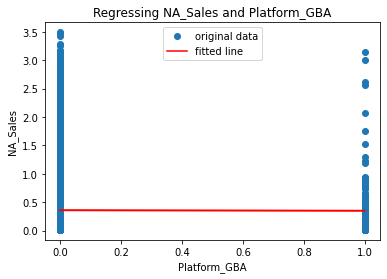

r2_value 0.0008380989154749449
p value 0.053717323901390654


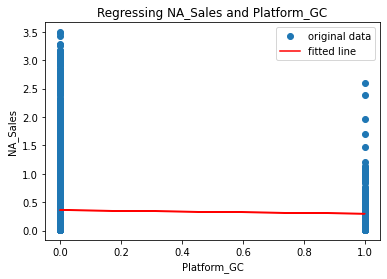

r2_value 0.005351390506093361
p value 1.0600159080038454e-06


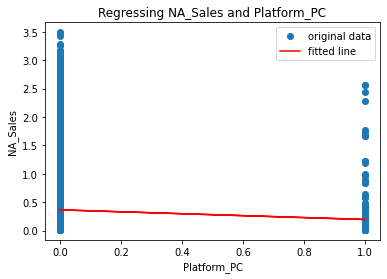

r2_value 0.0034636042672484533
p value 8.699321379780331e-05


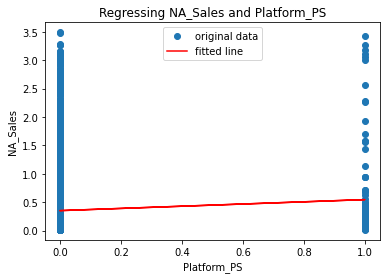

r2_value 0.0005040836187542067
p value 0.13466033840596459


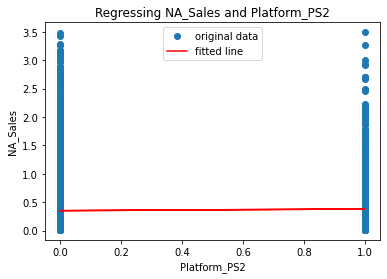

r2_value 0.003010399714053124
p value 0.0002540761436144181


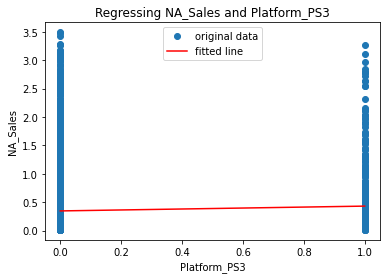

r2_value 1.7831308886771604e-06
p value 0.9291112339738401


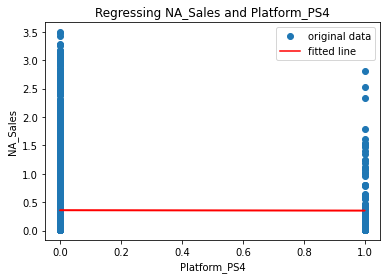

r2_value 0.0048283604615249245
p value 3.570568739284567e-06


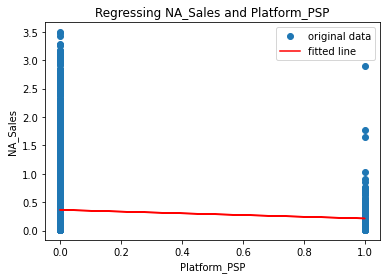

r2_value 0.002811877590957411
p value 0.00040736634257861114


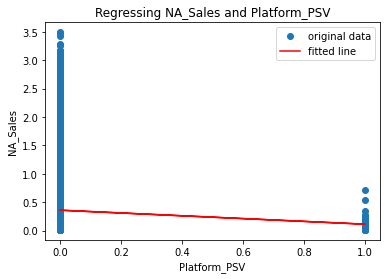

r2_value 0.00012874583115934397
p value 0.44967332018611683


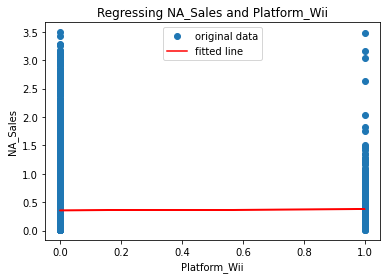

r2_value 0.0001197378602004463
p value 0.46598181151773344


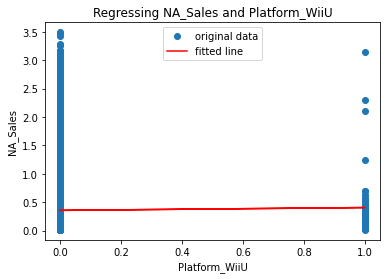

r2_value 0.007094210234960254
p value 1.8944173105770476e-08


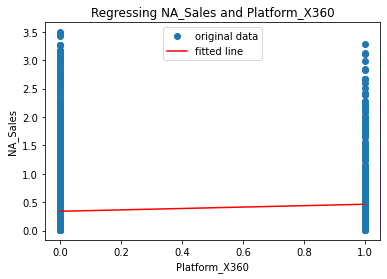

r2_value 0.004730793928791072
p value 4.480476055838904e-06


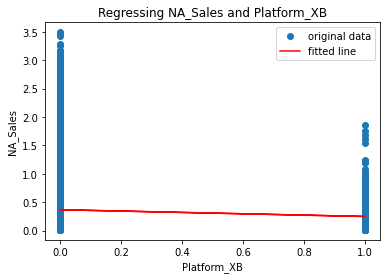

r2_value 0.0013096956789982082
p value 0.015872947234386328


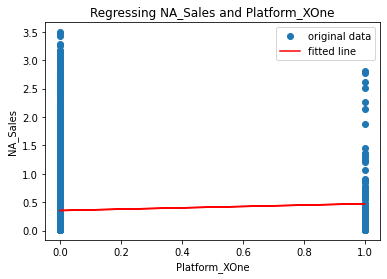

r2_value 0.00011626866289908165
p value 0.4725150168536386


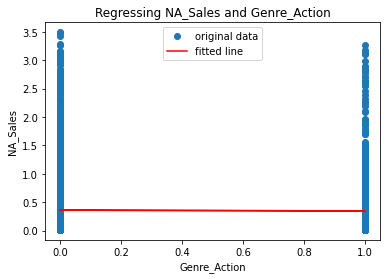

r2_value 0.003777690449382058
p value 4.1554526530555866e-05


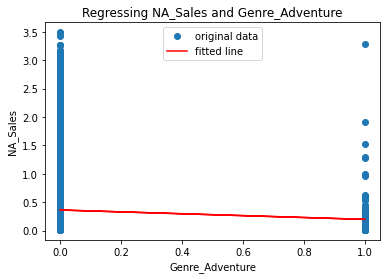

r2_value 9.492028854704557e-05
p value 0.5162772815858307


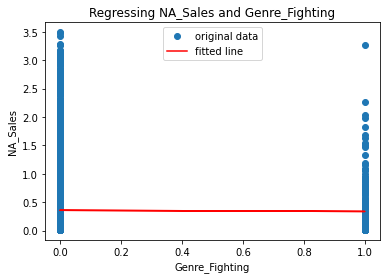

r2_value 0.0008360036037649799
p value 0.05401764073561362


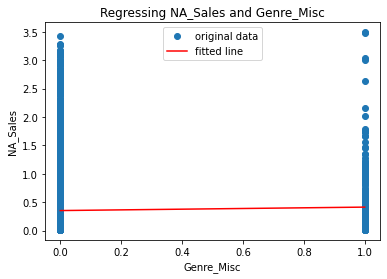

r2_value 0.00025036532550739654
p value 0.2917809396394993


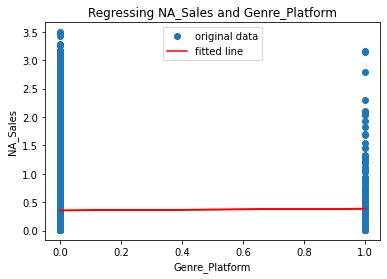

r2_value 0.0004049586096080201
p value 0.17998198062764717


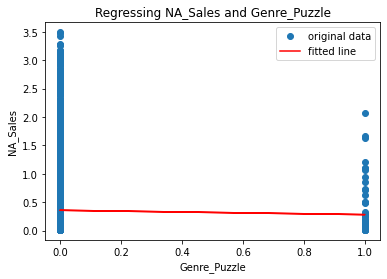

r2_value 4.3209349342916816e-10
p value 0.9988950391276901


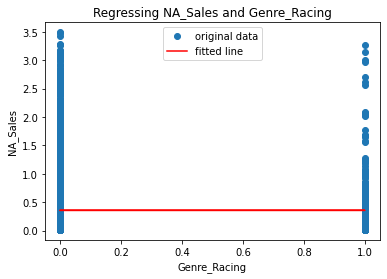

r2_value 2.452923473977499e-05
p value 0.7414293358462758


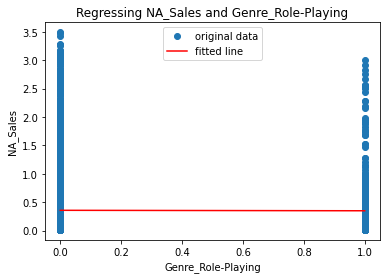

r2_value 0.0007702355247491793
p value 0.064410712905774


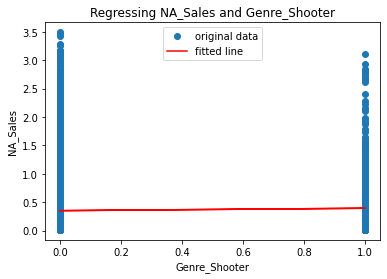

r2_value 5.716189912546162e-05
p value 0.6144675671095647


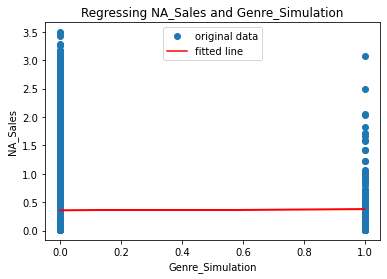

r2_value 0.0012902356418164132
p value 0.01667360281398084


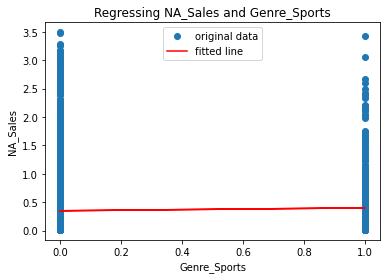

r2_value 0.004143229502739425
p value 1.7645289166714453e-05


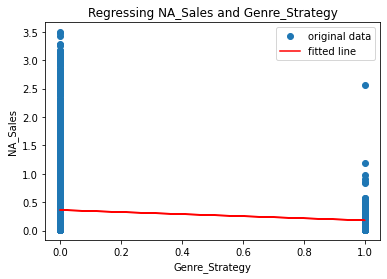

r2_value 0.003681925158682642
p value 5.2037898701948157e-05


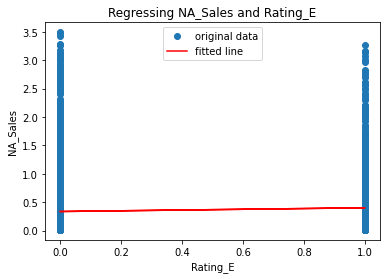

r2_value 0.003427724870316678
p value 9.46721167337957e-05


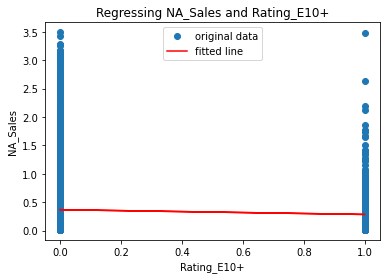

r2_value 0.004612695975245197
p value 5.898625280091384e-06


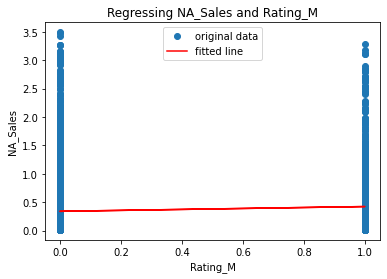

r2_value 0.004995559208814955
p value 2.420718588604469e-06


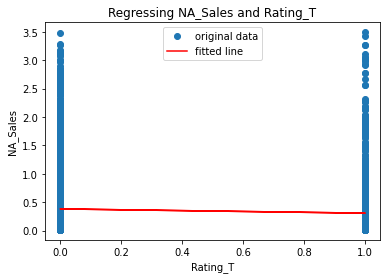

r2_value 0.0007903899674669982
p value 0.06101665065067376


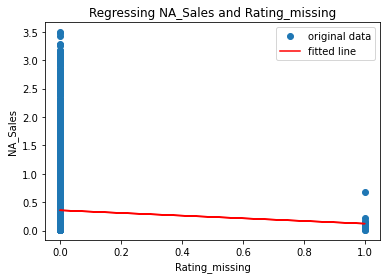

In [44]:
# B. Plot each model
# C. Show the R-Squared and P-value for each model
for col in X_train.drop('NA_Sales', axis=1).columns:
    helper_fun(col, X_train)

# Task 5 

## Code Chunk 5 - Simple Regression Model Training and Testing

In Code Chunk 5 the variable 'User_Score' is transformed using an exponential function. The code includes the orignal R-squared value and p value and plot and then shows the same information of the transformation of the exponential function to compare the two and note the changes. You can see the changes just in the plots, but can also compare the R-squared values and p values as well.

r2_value 0.019485015132064867
p value 9.147634738480213e-21


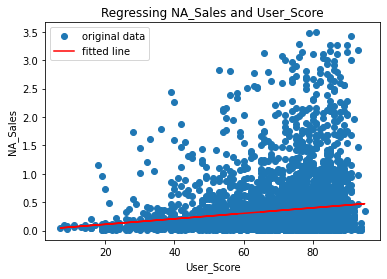

In [45]:
# A. Find a variable that appears to have non-linear distribution. 
# Transform the variable using log, squared, or exponential function.
helper_fun('User_Score',X_train)

In [46]:
X_train_2 = X_train.copy()
X_train_2['User_Score_EXP'] = X_train_2['User_Score']**.05

r2_value 0.016472485186843265
p value 8.993046936541594e-18


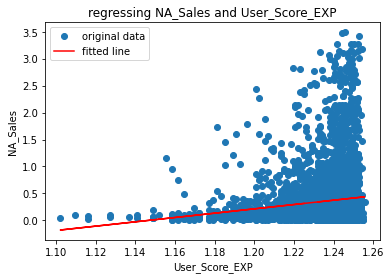

In [47]:
predictor = 'User_Score_EXP'

model = stats.linregress(X_train_2[predictor], X_train_2['NA_Sales'])
print("r2_value",model.rvalue**2)
print("p value",model.pvalue)

#print("r2_value",model.coef)
plt.plot(X_train_2[predictor], X_train_2['NA_Sales'], 'o', label='original data')
plt.plot(X_train_2[predictor], model.intercept + model.slope*X_train_2[predictor], 'r', label='fitted line')
plt.legend()
plt.title(f'regressing NA_Sales and {predictor}')
plt.xlabel(predictor)
plt.ylabel('NA_Sales')
plt.show()

# Task 6 - Convert HTML and IPYNB Files

In [49]:
# Render A5_Gardner_Tyler.ipynb to an HTML output file.  
!cp "/content/drive/MyDrive/Colab Notebooks/A5_Gardner_Tyler.ipynb" ./

!jupyter nbconvert --to html "A5_Gardner_Tyler.ipynb"

[NbConvertApp] Converting notebook A5_Gardner_Tyler.ipynb to html
[NbConvertApp] Writing 1543451 bytes to A5_Gardner_Tyler.html
